In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#读取MNIST12
dict = sio.loadmat('MNIST12')  #类型为字典
samples = dict['samples']
labels = dict['labels']
labels = labels.reshape(-1)  #转换矩阵形状
num, dim = samples.shape  #数据个数，维数
#展示图片
# plt.imshow(samples[0].reshape(28, 28))
# plt.figure()
# plt.imshow(samples[1].reshape(28, 28))

In [3]:
#为减少运算量，从数据集中随机选取5000个作为新数据集
index1 = np.random.choice(num, 5000, replace=False)
labels = labels[index1]
samples = samples[index1]
num = 5000

In [4]:
#计算矩阵D
distance = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        distance[i, j] = np.linalg.norm(samples[i] - samples[j])

In [5]:
#计算矩阵B
disti_ = np.sum(distance, axis=1)  #行求和
dist_j = np.sum(distance, axis=0)  #列求和
dist__ = np.sum(distance)

B = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        B[i, j] = (disti_[i] + dist_j[j] - num * distance[i, j]**2 -
                   dist__ / num) / 2 / num

In [6]:
#特征值分解
e_vals, e_vecs = np.linalg.eig(B)

C:\Users\ludon\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\ludon\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


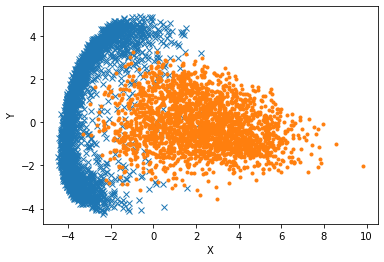

In [7]:
k = 2  #k维降维，k=2二维降维，k=3三维降维
index2 = np.argsort(e_vals)[:-k - 1:-1]  #取最大k个特征值的索引，从大到小排列
vals, vecs = e_vals[index2], e_vecs[:, index2]
Lambda = np.diag(vals)
result = np.matmul(vecs, np.sqrt(Lambda))
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(result[labels == 1, 0], result[labels == 1, 1], 'x')
plt.plot(result[labels == 2, 0], result[labels == 2, 1], '.')

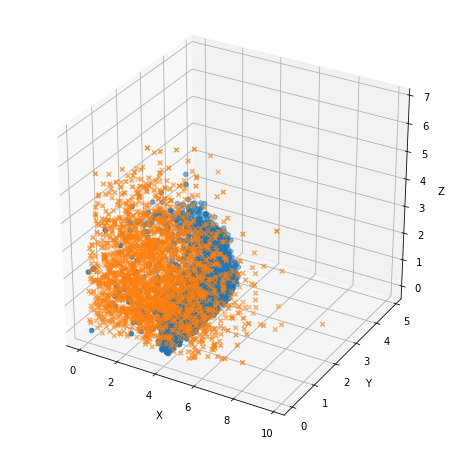

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

k = 3  #三维降维
index2 = np.argsort(e_vals)[:-k - 1:-1]  #取最大k个特征值的索引，从大到小排列
vals, vecs = e_vals[index2], e_vecs[:, index2]
Lambda = np.diag(vals)
result = np.abs(np.matmul(vecs, np.sqrt(Lambda)))

ax.scatter(result[labels == 1, 0],
           result[labels == 1, 1],
           result[labels == 1, 2],
           marker='o')
ax.scatter(result[labels == 2, 0],
           result[labels == 2, 1],
           result[labels == 2, 2],
           marker='x')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()